### merge train/test df

In [36]:
import pandas as pd
import numpy as np

train_df = pd.read_csv('data/application_train.csv', nrows=None)
# test_df = pd.read_csv('data/application_test.csv', nrows=None)
# print("Train samples: {}, test samples: {}".format(len(train_df), len(test_df)))
# df =  pd.concat([train_df, test_df], ignore_index=True)
df = train_df

In [37]:
bur_cluster = pd.read_csv('feature/bur_cluster.csv')
bureau_feature = pd.read_csv('feature/bureau_feature.csv')
ccb_feature = pd.read_csv('feature/ccb_feature.csv')
ip_feature = pd.read_csv('feature/ip_feature.csv')
pcb_feature = pd.read_csv('feature/pcb_feature.csv')
pa_feature = pd.read_csv('feature/pa_feature.csv')

for i in [bur_cluster, bureau_feature, ccb_feature, ip_feature, pcb_feature, pa_feature]:
    df = df.join(i, how='left', on='SK_ID_CURR', lsuffix='_left',rsuffix='_right')
    df['SK_ID_CURR'] = df['SK_ID_CURR_left'].values
    del df['SK_ID_CURR_left']
    del df['SK_ID_CURR_right']

In [32]:
categorical_list = []
numerical_list = []
for i in df.columns.tolist():
    if df[i].dtype=='object':
        categorical_list.append(i)
    else:
        numerical_list.append(i)
print('Number of categorical features:', str(len(categorical_list)))
print('Number of numerical features:', str(len(numerical_list)))

Number of categorical features: 16
Number of numerical features: 394


In [38]:
from sklearn.impute import SimpleImputer
df[numerical_list] = df[numerical_list].replace([np.inf, -np.inf], np.nan)
# df[numerical_list] = SimpleImputer(strategy='median').fit_transform(df[numerical_list])
# application[numerical_list] = SimpleImputer(missing_values=np.inf, strategy='median').fit_transform(application[numerical_list])

In [39]:
df = pd.get_dummies(df, drop_first=True)
print(df.shape)

(307511, 518)


### plt the feature num in train/test samples

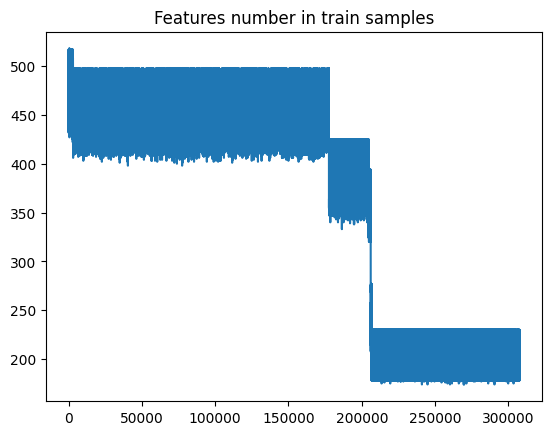

In [41]:
import matplotlib.pyplot as plt
df.count(axis=1).plot()
plt.title('Features number in train samples')
plt.show()


### get selected features list

In [25]:
selected_feature_list = pd.read_csv('feature/selected_feature.csv',header=None)
print(selected_feature_list.values.tolist()[1:])
df = df.loc[:,[i[0] for i in selected_feature_list.values.tolist()[1:]]+ ['TARGET','SK_ID_CURR']]
df.head()

[['pa_PRODUCT_COMBINATION_Cash X-Sell: high'], ['FLOORSMAX_AVG'], ['EXT_SOURCE_3'], ['EXT_SOURCE_2'], ['EXT_SOURCE_1'], ['DEF_30_CNT_SOCIAL_CIRCLE'], ['DAYS_EMPLOYED'], ['AMT_GOODS_PRICE'], ['AMT_CREDIT'], ['pa_NAME_CASH_LOAN_PURPOSE_Purchase of electronic equipment'], ['bur_total_amount_adj'], ['YEARS_BUILD_MEDI'], ['WALLSMATERIAL_MODE_Monolithic'], ['REG_CITY_NOT_WORK_CITY'], ['REGION_RATING_CLIENT_W_CITY'], ['REGION_RATING_CLIENT'], ['ORGANIZATION_TYPE_University'], ['ORGANIZATION_TYPE_Trade: type 5'], ['ORGANIZATION_TYPE_School'], ['ORGANIZATION_TYPE_Realtor'], ['ORGANIZATION_TYPE_Medicine'], ['ORGANIZATION_TYPE_Bank'], ['OCCUPATION_TYPE_Security staff'], ['OCCUPATION_TYPE_Sales staff'], ['NAME_TYPE_SUITE_Family'], ['NAME_INCOME_TYPE_Unemployed'], ['NAME_INCOME_TYPE_Pensioner'], ['LIVE_CITY_NOT_WORK_CITY'], ['FONDKAPREMONT_MODE_org spec account'], ['FLAG_WORK_PHONE'], ['FLAG_OWN_CAR_Y'], ['FLAG_DOCUMENT_3'], ['FLAG_DOCUMENT_2'], ['FLAG_DOCUMENT_16'], ['ELEVATORS_AVG'], ['DAYS_LAST_

,pa_PRODUCT_COMBINATION_Cash X-Sell: high,FLOORSMAX_AVG,EXT_SOURCE_3,EXT_SOURCE_2,EXT_SOURCE_1,DEF_30_CNT_SOCIAL_CIRCLE,DAYS_EMPLOYED,AMT_GOODS_PRICE,AMT_CREDIT,pa_NAME_CASH_LOAN_PURPOSE_Purchase of electronic equipment,...,FLOORSMAX_MEDI,FLAG_PHONE,FLAG_EMP_PHONE,FLAG_DOCUMENT_7,FLAG_DOCUMENT_6,FLAG_DOCUMENT_13,ELEVATORS_MEDI,DEF_60_CNT_SOCIAL_CIRCLE,TARGET,SK_ID_CURR
0,0.000000,0.0833,0.139376,0.262949,0.083037,2.0,-637.0,351000.0,406597.5,0.0,...,0.0833,1.0,1.0,0.0,0.0,0.0,0.00,2.0,1.0,100002.0
1,0.100000,0.2917,0.533482,0.622246,0.311267,0.0,-1188.0,1129500.0,1293502.5,0.0,...,0.2917,1.0,1.0,0.0,0.0,0.0,0.08,0.0,0.0,100003.0
2,0.333333,0.1667,0.729567,0.555912,0.506155,0.0,-225.0,135000.0,135000.0,0.0,...,0.1667,1.0,1.0,0.0,0.0,0.0,0.00,0.0,0.0,100004.0
3,0.000000,0.1667,0.533482,0.650442,0.506155,0.0,-3039.0,297000.0,312682.5,0.0,...,0.1667,0.0,1.0,0.0,0.0,0.0,0.00,0.0,0.0,100006.0
4,0.000000,0.1667,0.533482,0.322738,0.506155,0.0,-3038.0,513000.0,513000.0,0.0,...,0.1667,0.0,1.0,0.0,0.0,0.0,0.00,0.0,0.0,100007.0


In [27]:
features = df.loc[:,[i[0] for i in selected_feature_list.values.tolist()[1:]]]

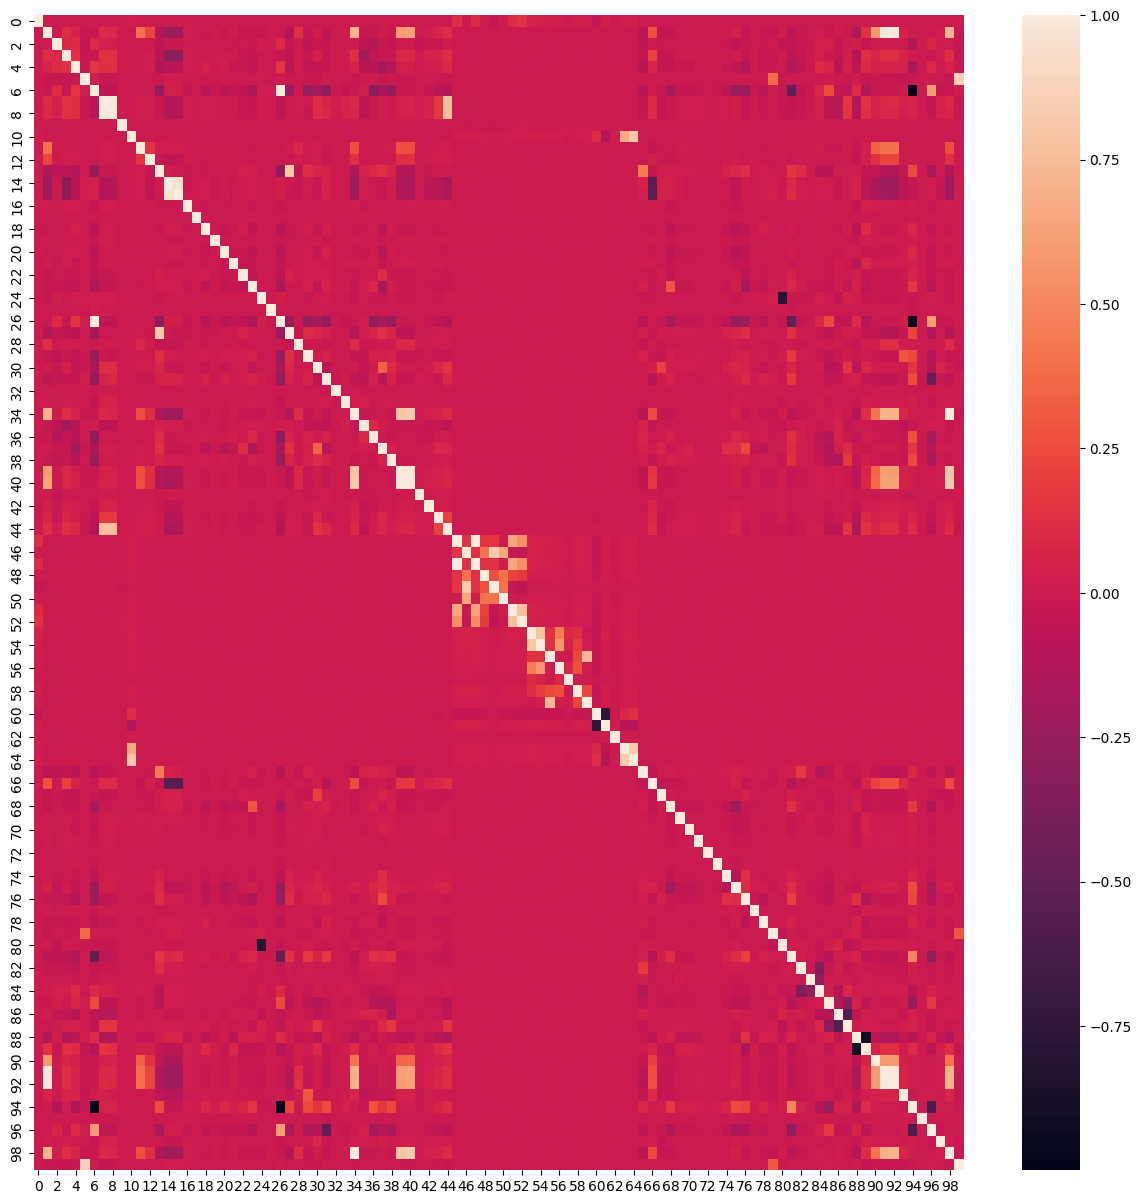

In [29]:
import seaborn as sns
corr_mat = features.corr()
plt.figure(figsize=[15, 15])
sns.heatmap(corr_mat.values, annot=False)
plt.show()

### model

In [ ]:
import numpy as np
import pandas as pd
import gc
import time
import category_encoders as ce
from contextlib import contextmanager
import lightgbm as lgb
from sklearn.feature_selection import VarianceThreshold
from sklearn.metrics import roc_auc_score, roc_curve
from sklearn.model_selection import KFold, StratifiedKFold
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
from scipy.cluster.vq import kmeans2, whiten
# from sklearn.preprocessing import Imputer
# from sklearn.decomposition import truncated_svd
# import category_encoders as ce
# from catboost import CatBoostClassifier
from sklearn import preprocessing
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
import re


df = df.rename(columns = lambda x:re.sub('[^A-Za-z0-9_]+', '', x))
n_train = train_df.shape[0]
num_folds = 5
encoding = 'ohe'
test_file_path = "Level_1_stack_test_lgbm.csv"
validation_file_path = 'Level_1_stack_validation_lgbm.csv'

train_df = df.iloc[0:n_train]
test_df = df.iloc[n_train:]

print("Starting LightGBM. Train shape: {}, test shape: {}".format(train_df.shape, test_df.shape))
# Cross validation model
folds = KFold(n_splits=num_folds, shuffle=True, random_state=1001)
# Create arrays and dataframes to store results
oof_preds = np.zeros(train_df.shape[0])
sub_preds = np.zeros(test_df.shape[0])
feature_importance_df = pd.DataFrame()
feats = [f for f in train_df.columns if f not in ['TARGET','SK_ID_CURR','SK_ID_BUREAU','SK_ID_PREV','index']]

#feats = [col for col in feats_0 if df[col].dtype == 'object']


print(train_df[feats].shape)
for n_fold, (train_idx, valid_idx) in enumerate(folds.split(train_df[feats], train_df['TARGET'])):
        
      
        categorical_columns = [col for col in df.columns if df[col].dtype == 'object']
        
        if encoding == 'ohe':
            
            enc = ce.OneHotEncoder(cols=categorical_columns).fit(train_df[feats].iloc[train_idx],
                                                                                       train_df['TARGET'].iloc[train_idx])
            x_train = enc.transform(train_df[feats].iloc[train_idx])
            x_valid = enc.transform(train_df[feats].iloc[valid_idx])
            x_test = enc.transform(test_df[feats])
            print(x_train.shape, x_valid.shape, x_test.shape)
            
            dtrain = lgb.Dataset(data=x_train, 
                             label=train_df['TARGET'].iloc[train_idx], 
                             free_raw_data=False)
            dvalid = lgb.Dataset(data=x_valid, 
                             label=train_df['TARGET'].iloc[valid_idx], 
                             free_raw_data=False)
            gc.collect()
            
        params = {
            'objective': 'regression',
            'boosting_type': 'goss',
            'nthread': 8,
            'learning_rate': 0.02,  
            'num_leaves': 2 ** 5,
            'colsample_bytree': 0.25,
            'subsample': 0.9,
            'max_depth': 8,
            'reg_alpha': 1,
            'reg_lambda': 2 ** 5,
            'min_split_gain': 0.1,
            'min_child_weight': 2 ** 5,
            'seed': 666,
            'scale_pos_weight' : 3,
            'verbose': -1,
            'metric': 'rmse',
            'max_bin': 2 ** 7
        }
        
        clf = lgb.train(
            params=params,
            train_set=dtrain,
            num_boost_round=10000,
            valid_sets=[dtrain, dvalid],
            # early_stopping_rounds=100,
            # verbose_eval=False
        )
        
        oof_preds[valid_idx] = clf.predict(dvalid.data)
        sub_preds += clf.predict(x_test) / folds.n_splits

        print('Fold %2d AUC : %.6f' % (n_fold + 1, roc_auc_score(dvalid.label, oof_preds[valid_idx])))
        #del clf, dtrain, dvalid
        #gc.collect()

print('Full AUC score %.6f' % roc_auc_score(train_df['TARGET'], oof_preds))
        
sub_df = test_df[['SK_ID_CURR']].copy()
sub_df['TARGET'] = sub_preds
sub_df[['SK_ID_CURR', 'TARGET']].to_csv(test_file_path, index= False)

val_df = train_df[['SK_ID_CURR', 'TARGET']].copy()
val_df['TARGET'] = oof_preds
val_df[['SK_ID_CURR', 'TARGET']].to_csv(validation_file_path, index= False)        

In [52]:
sub_df[['SK_ID_CURR', 'TARGET']].to_csv(test_file_path, index= False)

In [51]:
sub_df['SK_ID_CURR'] = sub_df['SK_ID_CURR'].astype('int')

### merge df with all features

In [47]:
sub_df.loc[sub_df['TARGET'] < 0,'TARGET'] = 0
sub_df.loc[sub_df['TARGET'] > 1,'TARGET'] = 1

(48744, 2)
(307511,)
(307511,)
Best Threshold=0.091938, G-Mean=0.683


,0
0,1.0
1,0.0
2,0.0
3,0.0
4,1.0


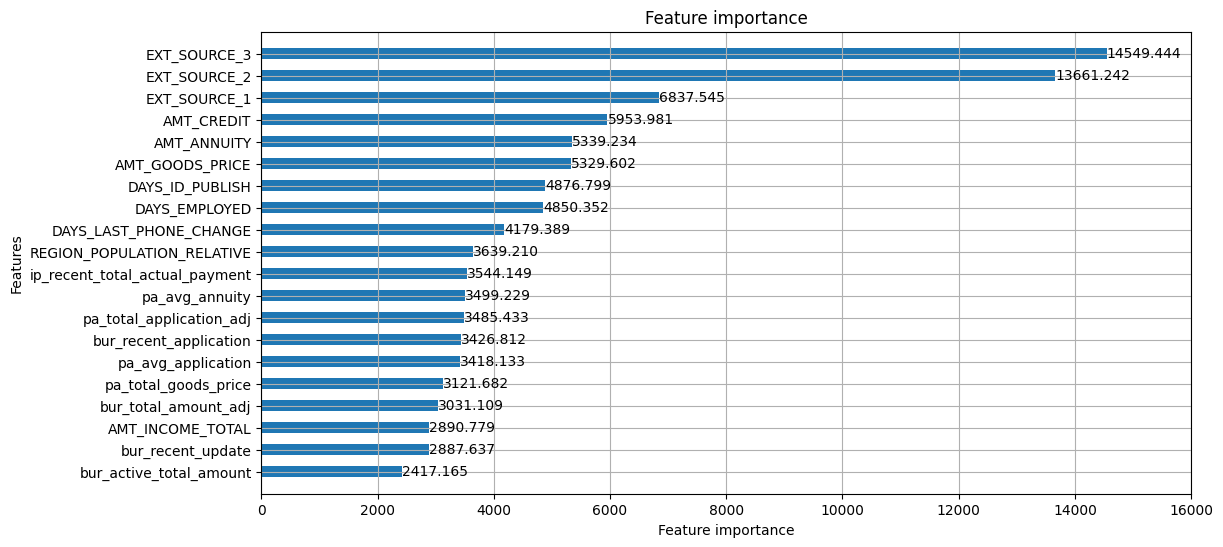

In [53]:
lgb.plot_importance(clf, height=0.5, max_num_features=20, ignore_zero = False, figsize = (12,6), importance_type ='gain')
print(sub_df.shape)
print(val_df['TARGET'].shape)
print(oof_preds.shape)
fpr, tpr, thresholds = roc_curve(train_df['TARGET'], oof_preds)
gmeans = np.sqrt(tpr * (1-fpr))
ix = np.argmax(gmeans)
print('Best Threshold=%f, G-Mean=%.3f' % (thresholds[ix], gmeans[ix]))
oof_preds1=pd.DataFrame(oof_preds.copy())
oof_preds1[oof_preds1 >= thresholds[ix]] = 1.0
oof_preds1[oof_preds1 < thresholds[ix]] = 0.0
oof_preds1.head()

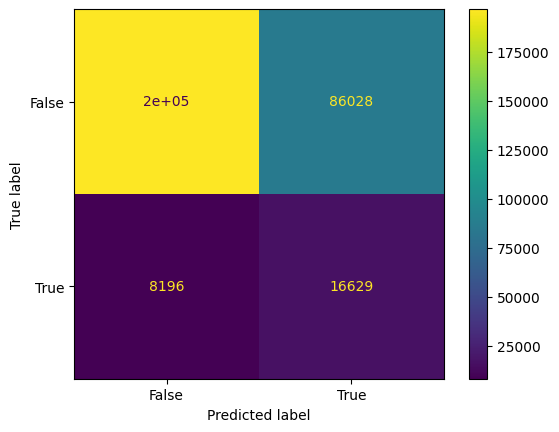

In [55]:

from sklearn import metrics
confusion_matrix = metrics.confusion_matrix(train_df['TARGET'], oof_preds1)
cm_display=metrics.ConfusionMatrixDisplay(confusion_matrix,display_labels=['False','True']).plot()
plt.show()

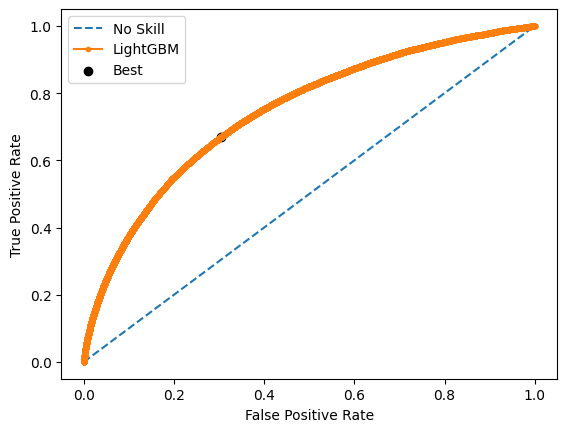

precision: 0.162
recall: 0.670
f_score: 0.261


In [56]:
from matplotlib import pyplot
pyplot.plot([0,1], [0,1], linestyle='--', label='No Skill')
pyplot.plot(fpr, tpr, marker='.', label='LightGBM')
pyplot.scatter(fpr[ix], tpr[ix], marker='o', color='black', label='Best')
# axis labels
pyplot.xlabel('False Positive Rate')
pyplot.ylabel('True Positive Rate')
pyplot.legend()
# show the plot
pyplot.show()
precision=metrics.precision_score(train_df['TARGET'],oof_preds1)
print('precision: %.3f' % precision)
recall=metrics.recall_score(train_df['TARGET'],oof_preds1)
print('recall: %.3f' % recall)
f_score=2*precision*recall/(precision+recall)
print('f_score: %.3f' % f_score)

In [57]:
thresholds=[0.5,0.2,0.12,0.11,0.09,0.07,0.05,0.03,0.01]
precision_list=[]
recall_list=[]
f_score_list=[]
for threshold in thresholds:
    oof_preds2=pd.DataFrame(oof_preds.copy())
    oof_preds2[oof_preds2 >= threshold] = 1.0
    oof_preds2[oof_preds2 < threshold] = 0.0
    precision=metrics.precision_score(train_df['TARGET'], oof_preds2)
    recall=metrics.recall_score(train_df['TARGET'], oof_preds2)
    f_score=2*precision*recall/(precision+recall)
    precision_list.append(precision)
    recall_list.append(recall)
    f_score_list.append(f_score)
    print('threshold: %.2f' % threshold)
    print('-----------------')
    print('precision: %.3f' % precision)
    print('recall: %.3f' % recall)
    print('f_score: %.3f' % f_score)


threshold: 0.50
-----------------
precision: 0.544
recall: 0.012
f_score: 0.023
threshold: 0.20
-----------------
precision: 0.277
recall: 0.297
f_score: 0.286
threshold: 0.12
-----------------
precision: 0.193
recall: 0.556
f_score: 0.286
threshold: 0.11
-----------------
precision: 0.181
recall: 0.594
f_score: 0.278
threshold: 0.09
-----------------
precision: 0.160
recall: 0.678
f_score: 0.259
threshold: 0.07
-----------------
precision: 0.139
recall: 0.764
f_score: 0.236
threshold: 0.05
-----------------
precision: 0.120
recall: 0.845
f_score: 0.210
threshold: 0.03
-----------------
precision: 0.103
recall: 0.918
f_score: 0.186
threshold: 0.01
-----------------
precision: 0.091
recall: 0.965
f_score: 0.167
